In [3]:
from sklearn.manifold import TSNE
import sklearn
from sklearn.svm import SVC
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
dataframe = pandas.read_csv('heart.csv',usecols = range(0,13), engine='python')
X = []
dataset = dataframe.values
# print dataset[0][1]
for i in dataset:
#     print i
    if(i[1] != 2):
        X.append(i)
# X = dataframe.values
# print X
dataframe = pandas.read_csv('heart.csv',usecols = [13], engine='python')
dataset = dataframe.values
Y = []
for i in dataset:
    Y.append(i[0])

[array([  70. ,    1. ,    4. ,  130. ,  322. ,    0. ,    2. ,  109. ,
          0. ,    2.4,    2. ,    3. ,    3. ]), array([  67. ,    0. ,    3. ,  115. ,  564. ,    0. ,    2. ,  160. ,
          0. ,    1.6,    2. ,    0. ,    7. ]), array([  57. ,    1. ,    2. ,  124. ,  261. ,    0. ,    0. ,  141. ,
          0. ,    0.3,    1. ,    0. ,    7. ]), array([  6.40000000e+01,   1.00000000e+00,   4.00000000e+00,
         1.28000000e+02,   2.63000000e+02,   0.00000000e+00,
         0.00000000e+00,   1.05000000e+02,   1.00000000e+00,
         2.00000000e-01,   2.00000000e+00,   1.00000000e+00,
         7.00000000e+00]), array([  7.40000000e+01,   0.00000000e+00,   2.00000000e+00,
         1.20000000e+02,   2.69000000e+02,   0.00000000e+00,
         2.00000000e+00,   1.21000000e+02,   1.00000000e+00,
         2.00000000e-01,   1.00000000e+00,   1.00000000e+00,
         3.00000000e+00]), array([  65. ,    1. ,    4. ,  120. ,  177. ,    0. ,    0. ,  140. ,
          0. ,    0.4,    

There is an error with t-sne on mac.

In [49]:
X = sklearn.preprocessing.normalize(X)
print X
tsne = TSNE(n_components=3, learning_rate=60, perplexity = 25)
X_tsne = tsne.fit_transform(X)# fig = plt.figure()
# print X_tsne


[[ 0.18883519  0.00269765  0.01079058 ...,  0.00539529  0.00809294
   0.00809294]
 [ 0.11143806  0.          0.00498976 ...,  0.00332651  0.          0.01164278]
 [ 0.17451353  0.00306164  0.00612328 ...,  0.00306164  0.          0.02143149]
 ..., 
 [ 0.15378367  0.          0.00549227 ...,  0.00549227  0.          0.00823841]
 [ 0.1994493   0.00349911  0.01399644 ...,  0.00699822  0.          0.02099466]
 [ 0.1905785   0.00284446  0.01137782 ...,  0.00568891  0.00853337
   0.00853337]]


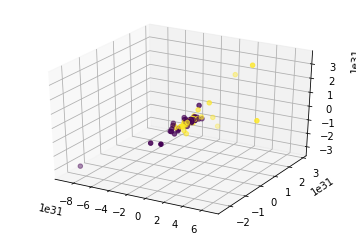

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=Y,)



# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y)
plt.show()

In [14]:
#
#  tsne.py
#
# Implementation of t-SNE in Python. The implementation was tested on Python 2.7.10, and it requires a working
# installation of NumPy. The implementation comes with an example on the MNIST dataset. In order to plot the
# results of this example, a working installation of matplotlib is required.
#
# The example can be run by executing: `ipython tsne.py`
#
#
#  Created by Laurens van der Maaten on 20-12-08.
#  Copyright (c) 2008 Tilburg University. All rights reserved.

import numpy as Math
import pylab as Plot

def Hbeta(D = Math.array([]), beta = 1.0):
	"""Compute the perplexity and the P-row for a specific value of the precision of a Gaussian distribution."""

	# Compute P-row and corresponding perplexity
	P = Math.exp(-D.copy() * beta);
	sumP = sum(P);
	H = Math.log(sumP) + beta * Math.sum(D * P) / sumP;
	P = P / sumP;
	return H, P;


def x2p(X = Math.array([]), tol = 1e-5, perplexity = 30.0):
	"""Performs a binary search to get P-values in such a way that each conditional Gaussian has the same perplexity."""

	# Initialize some variables
	print "Computing pairwise distances..."
	(n, d) = X.shape;
	sum_X = Math.sum(Math.square(X), 1);
	D = Math.add(Math.add(-2 * Math.dot(X, X.T), sum_X).T, sum_X);
	P = Math.zeros((n, n));
	beta = Math.ones((n, 1));
	logU = Math.log(perplexity);

	# Loop over all datapoints
	for i in range(n):

		# Print progress
		if i % 500 == 0:
			print "Computing P-values for point ", i, " of ", n, "..."

		# Compute the Gaussian kernel and entropy for the current precision
		betamin = -Math.inf;
		betamax =  Math.inf;
		Di = D[i, Math.concatenate((Math.r_[0:i], Math.r_[i+1:n]))];
		(H, thisP) = Hbeta(Di, beta[i]);

		# Evaluate whether the perplexity is within tolerance
		Hdiff = H - logU;
		tries = 0;
		while Math.abs(Hdiff) > tol and tries < 50:

			# If not, increase or decrease precision
			if Hdiff > 0:
				betamin = beta[i].copy();
				if betamax == Math.inf or betamax == -Math.inf:
					beta[i] = beta[i] * 2;
				else:
					beta[i] = (beta[i] + betamax) / 2;
			else:
				betamax = beta[i].copy();
				if betamin == Math.inf or betamin == -Math.inf:
					beta[i] = beta[i] / 2;
				else:
					beta[i] = (beta[i] + betamin) / 2;

			# Recompute the values
			(H, thisP) = Hbeta(Di, beta[i]);
			Hdiff = H - logU;
			tries = tries + 1;

		# Set the final row of P
		P[i, Math.concatenate((Math.r_[0:i], Math.r_[i+1:n]))] = thisP;

	# Return final P-matrix
	print "Mean value of sigma: ", Math.mean(Math.sqrt(1 / beta));
	return P;


def pca(X = Math.array([]), no_dims = 50):
	"""Runs PCA on the NxD array X in order to reduce its dimensionality to no_dims dimensions."""

	print "Preprocessing the data using PCA..."
	(n, d) = X.shape;
	X = X - Math.tile(Math.mean(X, 0), (n, 1));
	(l, M) = Math.linalg.eig(Math.dot(X.T, X));
	Y = Math.dot(X, M[:,0:no_dims]);
	return Y;


def tsne(X = Math.array([]), no_dims = 2, initial_dims = 50, perplexity = 30.0):
	"""Runs t-SNE on the dataset in the NxD array X to reduce its dimensionality to no_dims dimensions.
	The syntaxis of the function is Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array."""

	# Check inputs
	if isinstance(no_dims, float):
		print "Error: array X should have type float.";
		return -1;
	if round(no_dims) != no_dims:
		print "Error: number of dimensions should be an integer.";
		return -1;

	# Initialize variables
	X = pca(X, initial_dims).real;
	(n, d) = X.shape;
	max_iter = 1000;
	initial_momentum = 0.5;
	final_momentum = 0.8;
	eta = 500;
	min_gain = 0.01;
	Y = Math.random.randn(n, no_dims);
	dY = Math.zeros((n, no_dims));
	iY = Math.zeros((n, no_dims));
	gains = Math.ones((n, no_dims));

	# Compute P-values
	P = x2p(X, 1e-5, perplexity);
	P = P + Math.transpose(P);
	P = P / Math.sum(P);
	P = P * 4;									# early exaggeration
	P = Math.maximum(P, 1e-12);

	# Run iterations
	for iter in range(max_iter):

		# Compute pairwise affinities
		sum_Y = Math.sum(Math.square(Y), 1);
		num = 1 / (1 + Math.add(Math.add(-2 * Math.dot(Y, Y.T), sum_Y).T, sum_Y));
		num[range(n), range(n)] = 0;
		Q = num / Math.sum(num);
		Q = Math.maximum(Q, 1e-12);

		# Compute gradient
		PQ = P - Q;
		for i in range(n):
			dY[i,:] = Math.sum(Math.tile(PQ[:,i] * num[:,i], (no_dims, 1)).T * (Y[i,:] - Y), 0);

		# Perform the update
		if iter < 20:
			momentum = initial_momentum
		else:
			momentum = final_momentum
		gains = (gains + 0.2) * ((dY > 0) != (iY > 0)) + (gains * 0.8) * ((dY > 0) == (iY > 0));
		gains[gains < min_gain] = min_gain;
		iY = momentum * iY - eta * (gains * dY);
		Y = Y + iY;
		Y = Y - Math.tile(Math.mean(Y, 0), (n, 1));

		# Compute current value of cost function
		if (iter + 1) % 10 == 0:
			C = Math.sum(P * Math.log(P / Q));
			print "Iteration ", (iter + 1), ": error is ", C

		# Stop lying about P-values
		if iter == 100:
			P = P / 4;

	# Return solution
	return Y;

In [18]:
Y = tsne(X, 2, 50, 20.0)
print Y

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  270 ...


/Applications/Anaconda/anaconda/envs/syde522/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log
/Applications/Anaconda/anaconda/envs/syde522/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide
/Applications/Anaconda/anaconda/envs/syde522/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide


Mean value of sigma:  16.3211669984
Iteration  10 : error is  nan


/Applications/Anaconda/anaconda/envs/syde522/lib/python2.7/site-packages/ipykernel/__main__.py:148: RuntimeWarning: invalid value encountered in greater


Iteration  20 : error is  nan
Iteration  30 : error is  nan
Iteration  40 : error is  nan
Iteration  50 : error is  nan
Iteration  60 : error is  nan
Iteration  70 : error is  nan
Iteration  80 : error is  nan
Iteration  90 : error is  nan
Iteration  100 : error is  nan
Iteration  110 : error is  nan
Iteration  120 : error is  nan
Iteration  130 : error is  nan
Iteration  140 : error is  nan
Iteration  150 : error is  nan
Iteration  160 : error is  nan
Iteration  170 : error is  nan
Iteration  180 : error is  nan
Iteration  190 : error is  nan
Iteration  200 : error is  nan
Iteration  210 : error is  nan
Iteration  220 : error is  nan
Iteration  230 : error is  nan
Iteration  240 : error is  nan
Iteration  250 : error is  nan
Iteration  260 : error is  nan
Iteration  270 : error is  nan
Iteration  280 : error is  nan
Iteration  290 : error is  nan
Iteration  300 : error is  nan
Iteration  310 : error is  nan
Iteration  320 : error is  nan
Iteration  330 : error is  nan
Iteration  340 :